In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize, OrdinalEncoder
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, accuracy_score, classification_report

In [137]:
df = pd.read_csv('obesity_level.csv')
df.head()

id  Gender        Age    Height      Weight  \
0   0    Male  24.443011  1.699998   81.669950   
1   1  Female  18.000000  1.560000   57.000000   
2   2  Female  18.000000  1.711460   50.165754   
3   3  Female  20.952737  1.710730  131.274851   
4   4    Male  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP        CAEC  \
0                               1     1  2.000000  2.983297   Sometimes   
1                               1     1  2.000000  3.000000  Frequently   
2                               1     1  1.880534  1.411685   Sometimes   
3                               1     1  3.000000  3.000000   Sometimes   
4                               1     1  2.679664  1.971472   Sometimes   

   SMOKE      CH2O  SCC       FAF       TUE       CALC                 MTRANS  \
0      0  2.763573    0  0.000000  0.976473  Sometimes  Public_Transportation   
1      0  2.000000    0  1.000000  1.000000          0             Automobile   
2      0  1.910378    0  0.866045  1.673584          0  Public_Transportation   
3      0  1.674061    0  1.467863  0.780199  Sometimes  Public_Transportation   
4      0  1.979848    0  1.967973  0.931721  Sometimes  Public_Transportation   

               0be1dad  
0  Overweight_Level_II  
1         0rmal_Weight  
2  Insufficient_Weight  
3     Obesity_Type_III  
4  Overweight_Level_II

# Tóm tắt dữ liệu
Quy mô dữ liệu:
- 20758 hàng dữ liệu
- Tổng có 18 cột
- 14 cột mô tả thông tin lối sống và chỉ số mỗi người



## Các thuộc tính đầu vào

| Cột | Ý nghĩa | Dữ liệu |
|-----|---------|---------|
| Gender | Giới tính | Male, Female |
| Age | Tuổi | Số tuổi chính xác |
| Height | Chiều cao | Chiều cao (mét) |
| Weight | Cân nặng | Cân nặng (Kg) |
| family_history_with_overweight | Tiền sử gia đình | 0, 1 |
| FAVC | Ăn thực phẩm nhiều calo thường xuyên | 0, 1 |
| FCVC | Mức độ ăn rau | 0 đến 3 |
| NCP | Số bữa ăn chính mỗi ngày | 0 đến 4 |
| CAEC | Ăn vặt giữa các bữa hay không | Sometimes, Frequently, Always, 0 |
| SMOKE | Có hút thuốc hay không | 0, 1 |
| CH2O | Lượng nước uống mỗi ngày | Lượng nước (lít)  |
| SCC | Tiêu thụ đồ uống có calo | 0, 1 |
| FAF | Tần suất hoạt động thể chất | 0 đến 3 |
| TUE | Thời gian sử dụng thiết bị công nghệ mỗi ngày | 0 đến 1 |
| CALC | Tiêu thụ rượu | Sometimes, Frequently, 0 |
| MTRANS | Phương tiện di chuyển chính | Public_Transportation, Automobile, Walking, Motorbike, Bike |

## Thuộc tính đầu ra

0be1dad: Các mức độ béo phì

| Mức độ | Ý nghĩa | Phạm vi BMI |
|--------|---------|-------------|
| Insufficient_Weight | Thiếu cân | < 18.5 |
| 0rmal_Weight | Cân nặng khỏe mạnh | 18.5 - 24.9 |
| Overweight_Level_I | Thừa cân cấp độ 1 | 25.0 - 27.5 |
| Overweight_Level_II | Thừa cân cấp độ 2 | 27.5 - 29.9 |
| Obesity_Type_I | Béo phì cấp độ 1 | 30.0 - 34.9 |
| Obesity_Type_II | Béo phì cấp độ 2 | 35.0 - 39.9 |
| Obesity_Type_III | Béo phì cấp độ 3 | >= 40.0 |

## Các bước xử lý dữ liệu

1. Kiểm tra thêm một số giá trị bất thường
2. Sửa lỗi chính tả
3. Chuẩn hóa kiểu dữ liệu
4. Encode các biến phân loại: Gender, CAEC, CALC.


In [138]:
# tổng quan dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [139]:
df.describe()

id           Age        Height        Weight  \
count  20758.00000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768   
std     5992.46278      5.688072      0.087312     26.379443   
min        0.00000     14.000000      1.450000     39.000000   
25%     5189.25000     20.000000      1.631856     66.000000   
50%    10378.50000     22.815416      1.700000     84.064875   
75%    15567.75000     26.000000      1.762887    111.600553   
max    20757.00000     61.000000      1.975663    165.057269   

       family_history_with_overweight          FAVC          FCVC  \
count                    20758.000000  20758.000000  20758.000000   
mean                         0.819636      0.914443      2.445908   
std                          0.384500      0.279716      0.533218   
min                          0.000000      0.000000      1.000000   
25%                          1.000000      1.000000      2.000000   
50%                          1.000000      1.000000      2.393837   
75%                          1.000000      1.000000      3.000000   
max                          1.000000      1.000000      3.000000   

                NCP         SMOKE          CH2O           SCC           FAF  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean       2.761332      0.011803      2.029418      0.033096      0.981747   
std        0.705375      0.108000      0.608467      0.178891      0.838302   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        3.000000      0.000000      1.792022      0.000000      0.008013   
50%        3.000000      0.000000      2.000000      0.000000      1.000000   
75%        3.000000      0.000000      2.549617      0.000000      1.587406   
max        4.000000      1.000000      3.000000      1.000000      3.000000   

                TUE  
count  20758.000000  
mean       0.616756  
std        0.602113  
min        0.000000  
25%        0.000000  
50%        0.573887  
75%        1.000000  
max        2.000000

In [140]:
# Thấy rằng các cột đều không có giá trị null nhưng cột 0be1dad nên đổi tên để dẽ đọc hơn
df = df.rename(columns={'0be1dad': 'obesity_level'})
df.head()

id  Gender        Age    Height      Weight  \
0   0    Male  24.443011  1.699998   81.669950   
1   1  Female  18.000000  1.560000   57.000000   
2   2  Female  18.000000  1.711460   50.165754   
3   3  Female  20.952737  1.710730  131.274851   
4   4    Male  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP        CAEC  \
0                               1     1  2.000000  2.983297   Sometimes   
1                               1     1  2.000000  3.000000  Frequently   
2                               1     1  1.880534  1.411685   Sometimes   
3                               1     1  3.000000  3.000000   Sometimes   
4                               1     1  2.679664  1.971472   Sometimes   

   SMOKE      CH2O  SCC       FAF       TUE       CALC                 MTRANS  \
0      0  2.763573    0  0.000000  0.976473  Sometimes  Public_Transportation   
1      0  2.000000    0  1.000000  1.000000          0             Automobile   
2      0  1.910378    0  0.866045  1.673584          0  Public_Transportation   
3      0  1.674061    0  1.467863  0.780199  Sometimes  Public_Transportation   
4      0  1.979848    0  1.967973  0.931721  Sometimes  Public_Transportation   

         obesity_level  
0  Overweight_Level_II  
1         0rmal_Weight  
2  Insufficient_Weight  
3     Obesity_Type_III  
4  Overweight_Level_II

In [141]:
#kiểm tra is nan
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
obesity_level                     0
dtype: int64

In [142]:
# Drop cột không dùng id
df = df.drop(['id'], axis=1)
df.head()

Gender        Age    Height      Weight  family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                               1   
1  Female  18.000000  1.560000   57.000000                               1   
2  Female  18.000000  1.711460   50.165754                               1   
3  Female  20.952737  1.710730  131.274851                               1   
4    Male  31.641081  1.914186   93.798055                               1   

   FAVC      FCVC       NCP        CAEC  SMOKE      CH2O  SCC       FAF  \
0     1  2.000000  2.983297   Sometimes      0  2.763573    0  0.000000   
1     1  2.000000  3.000000  Frequently      0  2.000000    0  1.000000   
2     1  1.880534  1.411685   Sometimes      0  1.910378    0  0.866045   
3     1  3.000000  3.000000   Sometimes      0  1.674061    0  1.467863   
4     1  2.679664  1.971472   Sometimes      0  1.979848    0  1.967973   

        TUE       CALC                 MTRANS        obesity_level  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000          0             Automobile         0rmal_Weight  
2  1.673584          0  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [143]:
# Kiểm tra thêm một số giá trị bất thường
if (df['Age'] > 100).any():
    print(f"Age > 100: {(df['Age'] > 100).sum()} giá trị")
else:
    print("Tất cả giá trị trong cột 'Age' đều <= 100.")
if (df['FCVC'] > 3).any() or (df['FCVC'] < 1).any():
    print(f"FCVC ngoài khoảng 1-3: {(df['FCVC'] < 1).sum() + (df['FCVC'] > 3).sum()} giá trị")
else:
    print("Tất cả giá trị trong cột 'FCVC' đều trong khoảng 1-3.")
if (df['NCP'] > 4).any() or (df['NCP'] < 1).any():
    print(f"NCP ngoài khoảng 1-4: {(df['NCP'] < 1).sum() + (df['NCP'] > 4).sum()} giá trị")
else:
    print("Tất cả giá trị trong cột 'NCP' đều trong khoảng 1-4.")   

Tất cả giá trị trong cột 'Age' đều <= 100.
Tất cả giá trị trong cột 'FCVC' đều trong khoảng 1-3.
Tất cả giá trị trong cột 'NCP' đều trong khoảng 1-4.


## Chuẩn hóa dữ liệu

In [144]:
# Sửa lỗi chính tả trong obesity_level
df['obesity_level'] = df['obesity_level'].replace('0rmal_Weight', 'Normal_Weight')
df['obesity_level'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [145]:
# Danh sách các cột theo loại
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
binary_cols    = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
ordinal_cols   = ['CAEC', 'CALC']
nominal_cols   = ['MTRANS']

In [146]:
# Thay giá trị 0 thành No trong các cột phân loại
df['CAEC'] = df['CAEC'].replace('0', 'No')
df['CALC'] = df['CALC'].replace('0', 'No')

In [147]:
# định nghĩa bước tiền xử lý trước khi đưa vào mô hình

# tạo từ điển cho các biến phân loại thứ tự
ordinal_categories = {
    'CAEC': ['No', 'Sometimes', 'Frequently', 'Always'],
    'CALC': ['No', 'Sometimes', 'Frequently']
}


# xây dựng bộ tiền xử lý
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('binary', OneHotEncoder(drop='if_binary'), binary_cols),
        ('ord_caec', OrdinalEncoder(categories=[ordinal_categories['CAEC']]), ['CAEC']),
        ('ord_calc', OrdinalEncoder(categories=[ordinal_categories['CALC']]), ['CALC']),
        ('nom', OneHotEncoder(handle_unknown='ignore'), nominal_cols)
    ],
    remainder='drop'  # bỏ cột id
)

- numerical_cols: chuẩn hóa bằng StandardScaler
    + Biến số được đưa về mean=0, std=1 để mô hình học ổn định.
- binary_cols: dùng OneHotEncoder(drop='if_binary')
    + Nếu cột chỉ có 2 giá trị, drop một cột để tránh đa cộng tuyến.
    + Chuyển thành 0/1 nếu chưa phải.
- CAEC và CALC: dùng OrdinalEncoder với thứ bậc xác định
    + categories=[...] giữ thứ tự giá trị.
    + Ví dụ No < Sometimes < Frequently < Always.
    + Sau đó 0 < 1 < 2 < 3.
- nominal_cols: dùng OneHotEncoder(handle_unknown='ignore')
    + Các cột categorical không có thứ bậc.
    + handle_unknown='ignore' bỏ qua giá trị lạ khi transform.
- remainder='drop'
    + Các cột còn lại (ví dụ id) sẽ bị bỏ.

Kết quả: preprocessor sẽ nhận X thô và trả về ma trận số đã chuẩn hóa và mã hóa đầy đủ cho mô hình học.

## Vẽ các biểu đồ

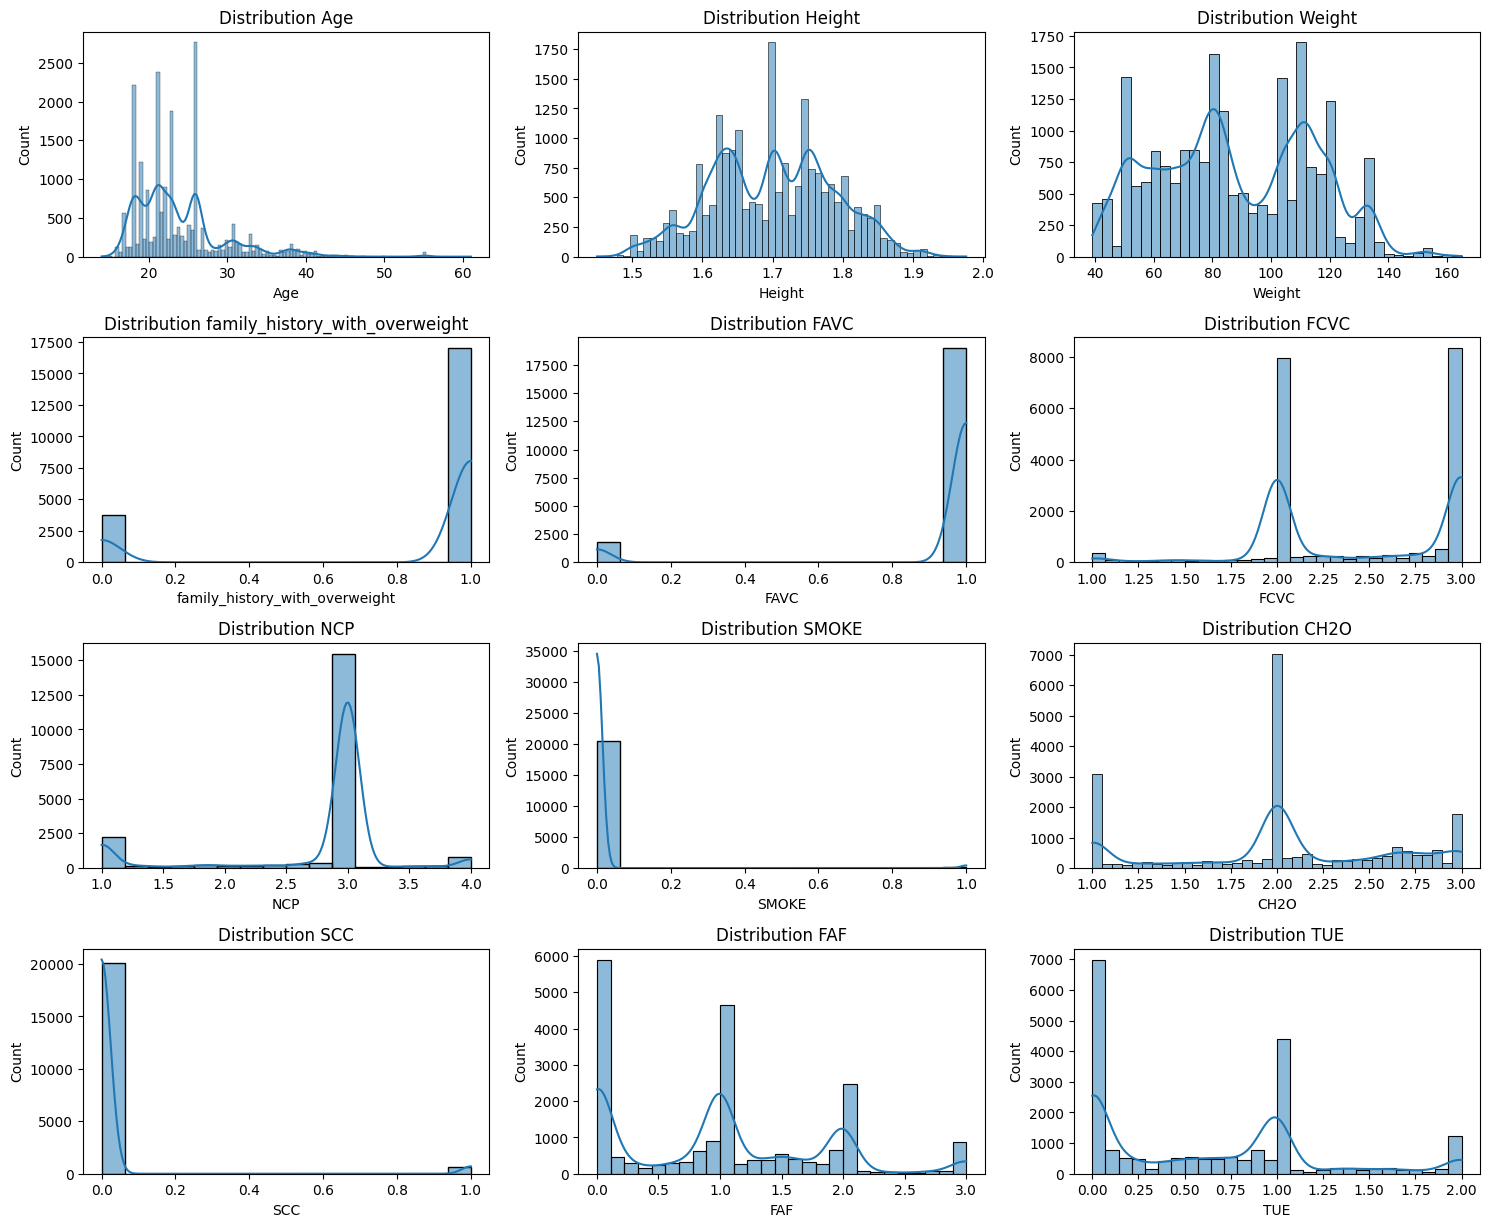

In [148]:
# Chỉ chọn các cột số
numeric_columns = df.select_dtypes(include='number').columns

# Thay thế inf và -inf bằng NaN
df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Phân bố cho tất cả các đặc điểm số
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Nhận xét các biểu đồ phân bố đặc trưng (Distribution plots) trong dữ liệu dự đoán béo phì
Các biểu đồ là histogram kết hợp KDE (Kernel Density Estimate), hiển thị phân bố của từng đặc trưng. Dưới đây là nhận xét chi tiết, ngắn gọn và phù hợp để đưa vào slide thuyết trình (phần Mô tả dữ liệu hoặc EDA):

- Age (Tuổi): Phân bố đa đỉnh (multimodal), tập trung mạnh ở khoảng 18-30 tuổi (đỉnh cao nhất ~25 tuổi), giảm dần về tuổi cao hơn. Dữ liệu chủ yếu từ người trẻ.
- Height (Chiều cao): Phân bố gần chuẩn (bell-shaped), nhưng hơi lệch phải, trung bình khoảng 1.70-1.75m, có hai đỉnh nhỏ (có thể do phân biệt giới tính nam/nữ).
- Weight (Cân nặng): Phân bố đa đỉnh, trải rộng từ 40-160kg, không chuẩn, có nhiều nhóm (tương ứng các mức béo phì khác nhau).
- family_history_with_overweight (Tiền sử gia đình thừa cân): Binary (0/1), mất cân bằng nghiêm trọng: ~80-85% có tiền sử (yes=1), chỉ ~15-20% không có (0).
- FAVC (Thường ăn đồ calo cao): Binary, mất cân bằng mạnh: hầu hết (~90%) trả lời yes (1).
- FCVC (Tần suất ăn rau): Liên tục từ 1-3, phân bố gần chuẩn, đỉnh tại ~2.5-3 (thường ăn rau khá nhiều).
- NCP (Số bữa chính/ngày): Tập trung mạnh tại 3 bữa (~70-80%), ít người ăn 1-2 hoặc 4 bữa.
- SMOKE (Hút thuốc): Binary, mất cân bằng cực mạnh: ~98-99% không hút (0), rất ít hút thuốc (1).
- CH2O (Lượng nước uống/ngày): Phân bố đa đỉnh, trung bình ~2 lít, dao động 1-3 lít.
- FAF (Tần suất hoạt động thể chất): Phân bố đa đỉnh, nhiều người ít hoạt động (đỉnh tại 0), một phần trung bình (1-2), ít người hoạt động nhiều (>2).
- TUE (Thời gian dùng thiết bị điện tử): Tập trung mạnh tại ~0-1 giờ, ít người dùng nhiều (>1.5).

Nhận xét tổng quát:

Dữ liệu có nhiều đặc trưng binary mất cân bằng nghiêm trọng (family_history, FAVC, SMOKE) → cần xử lý bằng class_weight='balanced' hoặc oversampling.
Các đặc trưng liên tục (Age, Height, Weight, FCVC, CH2O...) có phân bố đa dạng → cần StandardScaler.
Không có outlier rõ rệt, dữ liệu khá sạch.

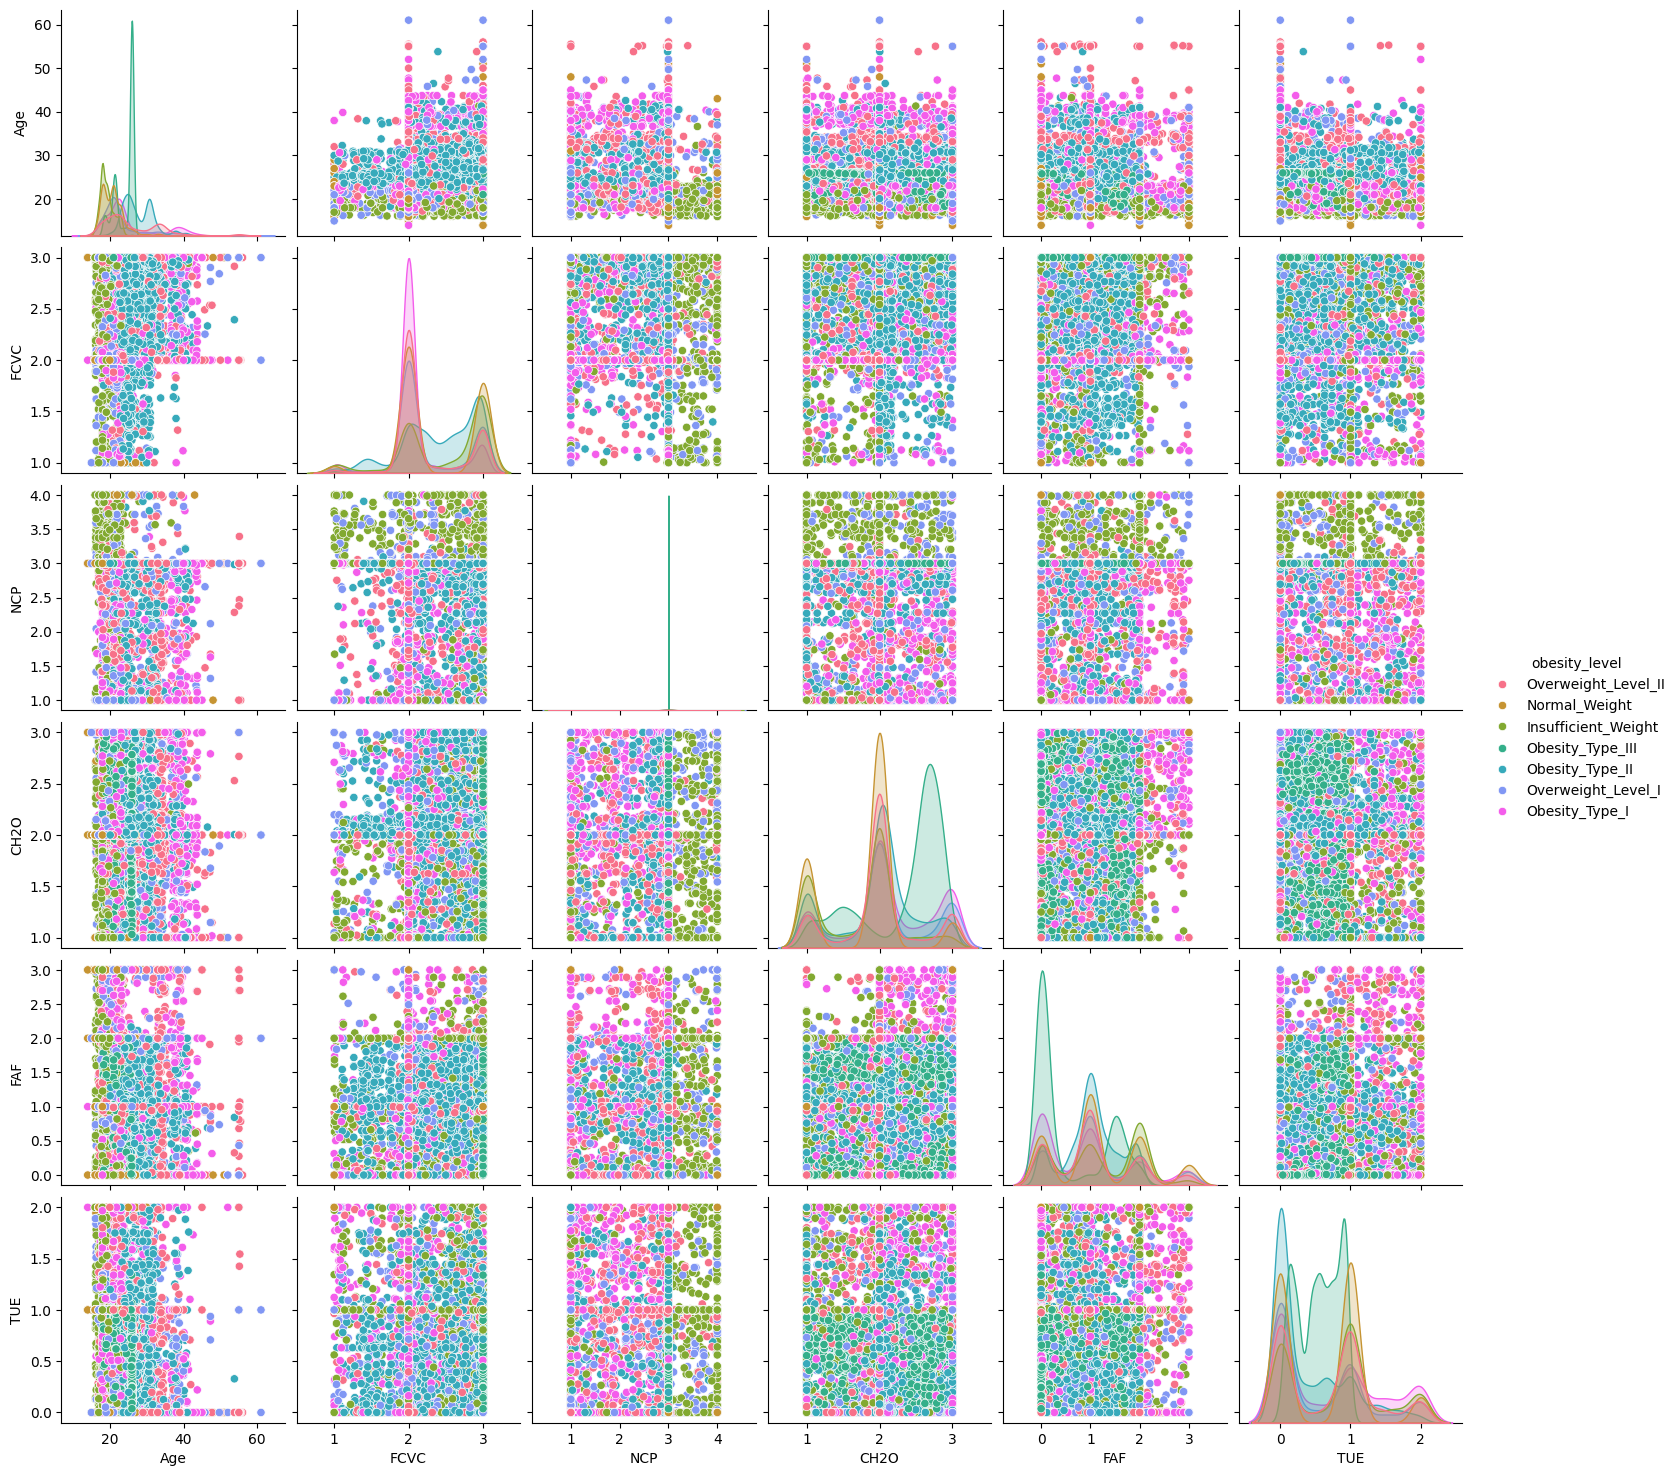

In [149]:
# Chọn các cột numerical quan trọng
num_cols = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Tạo DataFrame chỉ chứa các cột này + cột target để tô màu
eda_df = df[num_cols + ['obesity_level']]

# Vẽ pairplot, tô màu theo mức độ béo phì (rất hữu ích!)
sns.pairplot(eda_df, hue='obesity_level', diag_kind='kde', palette='husl')

plt.show()

Nhận xét về biểu đồ Pairplot (Scatter matrix theo lớp béo phì)
Biểu đồ này là pairplot (tương tự seaborn.pairplot) hiển thị mối quan hệ đôi một giữa các đặc trưng chính (Age, FCVC, NCP, CH2O, FAF, TUE) và phân bố trên đường chéo, với màu sắc đại diện cho 7 lớp mức độ béo phì (legend bên phải: Obesity_Level_I, Overweight_Level_II, Normal_Weight, Insufficient_Weight, Obesity_Type_III, Obesity_Type_I, Overweight_Level_I).
Nhận xét chi tiết:

- Age (Tuổi): Các lớp béo phì cao hơn (Obesity_Type_I, II, III - màu nâu, xanh lá) tập trung ở tuổi thấp hơn (~18-30), trong khi Normal_Weight và Insufficient_Weight trải rộng hơn. Người trẻ dễ rơi vào nhóm béo phì nặng.
- FCVC (Tần suất ăn rau): Không có sự phân tách rõ rệt giữa các lớp → đặc trưng này ít phân biệt tốt giữa các mức béo phì.
- NCP (Số bữa chính/ngày): Phân bố tương tự nhau, ít sự khác biệt giữa lớp.
- CH2O (Lượng nước uống): Một số lớp (Obesity_Type_III) có xu hướng uống nhiều hơn, nhưng chồng chéo lớn.
- FAF (Tần suất hoạt động thể chất): Rõ ràng nhất! Các lớp béo phì nặng (Obesity_Type_I-III) có FAF thấp (gần 0 - ít vận động), trong khi Normal_Weight và Insufficient_Weight có FAF cao hơn → Hoạt động thể chất là yếu tố quan trọng phân biệt.
- TUE (Thời gian dùng thiết bị điện tử): Lớp béo phì có TUE cao hơn một chút, nhưng chồng chéo nhiều.

Tổng quát:
Có sự chồng chéo lớn giữa các lớp → bài toán multi-class khó, cần mô hình mạnh như Random Forest.
Các đặc trưng như FAF và Age có khả năng phân biệt tốt nhất.
Dữ liệu cho thấy lối sống (ít vận động) liên quan mạnh đến béo phì.


Nhận xét này rất phù hợp đưa vào slide Mô tả dữ liệu hoặc EDA để minh họa tính phức tạp của bài toán.

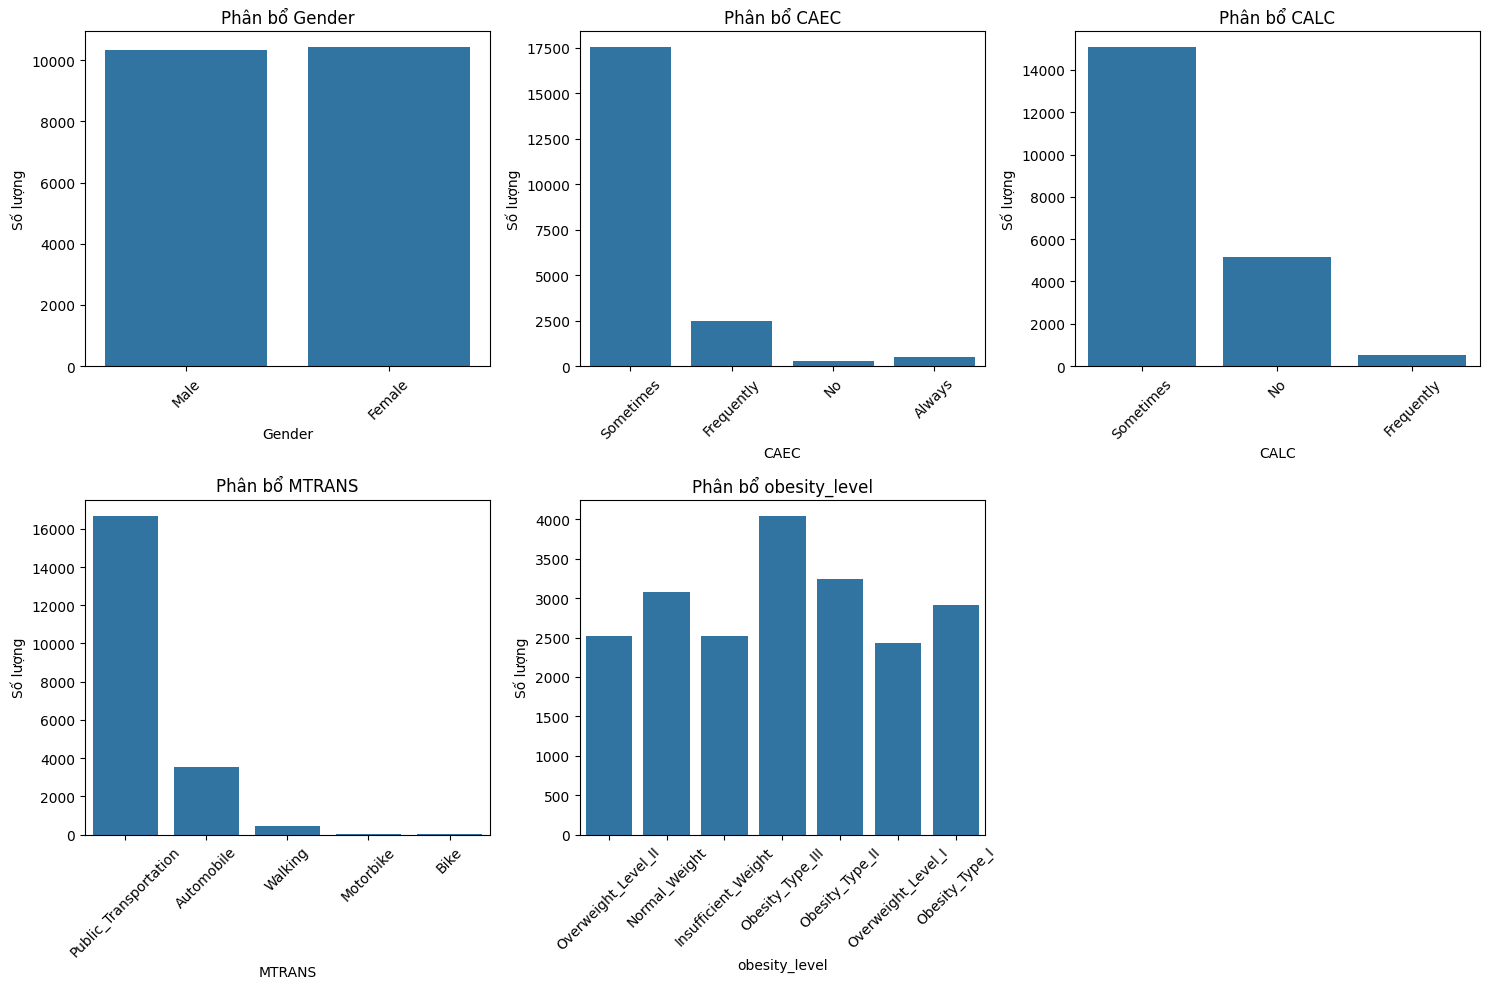

In [150]:
# Chỉ chọn các cột phân loại
non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns

# Kiểm tra các cột không phải là số
if len(non_numeric_columns) == 0:
    print("Tập dữ liệu không chứa cột nào không phải là số.")
else:
    # Biểu đồ phân bố cho tất cả các đặc điểm phân loại.
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(non_numeric_columns, 1):
        plt.subplot(len(non_numeric_columns) // 3 + 1, 3, i)
        sns.countplot(x=col, data=df)
        plt.title(f'Phân bổ {col}')
        plt.xlabel(col)
        plt.ylabel('Số lượng')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

Nhận xét về biểu đồ phân bố categorical và lớp target
Các biểu đồ là countplot/bar chart hiển thị số lượng mẫu theo từng giá trị categorical và phân bố lớp béo phì (obesity_level).

- Gender (Giới tính): Cân bằng gần như hoàn hảo (~50% Male, ~50% Female) → không mất cân bằng giới tính.
- CAEC (Ăn giữa bữa): Mất cân bằng mạnh: đa số "Sometimes" (>90%), rất ít "Frequently", "Always", "no" → đặc trưng này có thể ít phân biệt, cần xem xét kết hợp hoặc loại nếu không quan trọng.
- CALC (Uống rượu): Mất cân bằng: đa số "Sometimes" (~70-80%), một phần "no" (~25%), rất ít "Frequently" và "Always" → tương tự CAEC.
- obesity_level (Lớp target): Phân bố khá cân bằng giữa 7 lớp, với Obesity_Type_I cao nhất (~4000 mẫu), các lớp khác ~2500-3500 → không mất cân bằng nghiêm trọng ở target (tốt cho multi-class, không cần oversampling mạnh, class_weight='balanced' vẫn hữu ích để tối ưu).

Nhận xét tổng quát: Dữ liệu categorical có mất cân bằng ở hành vi (CAEC, CALC), nhưng target cân bằng → mô hình Random Forest với class_weight='balanced' phù hợp như code của bạn.

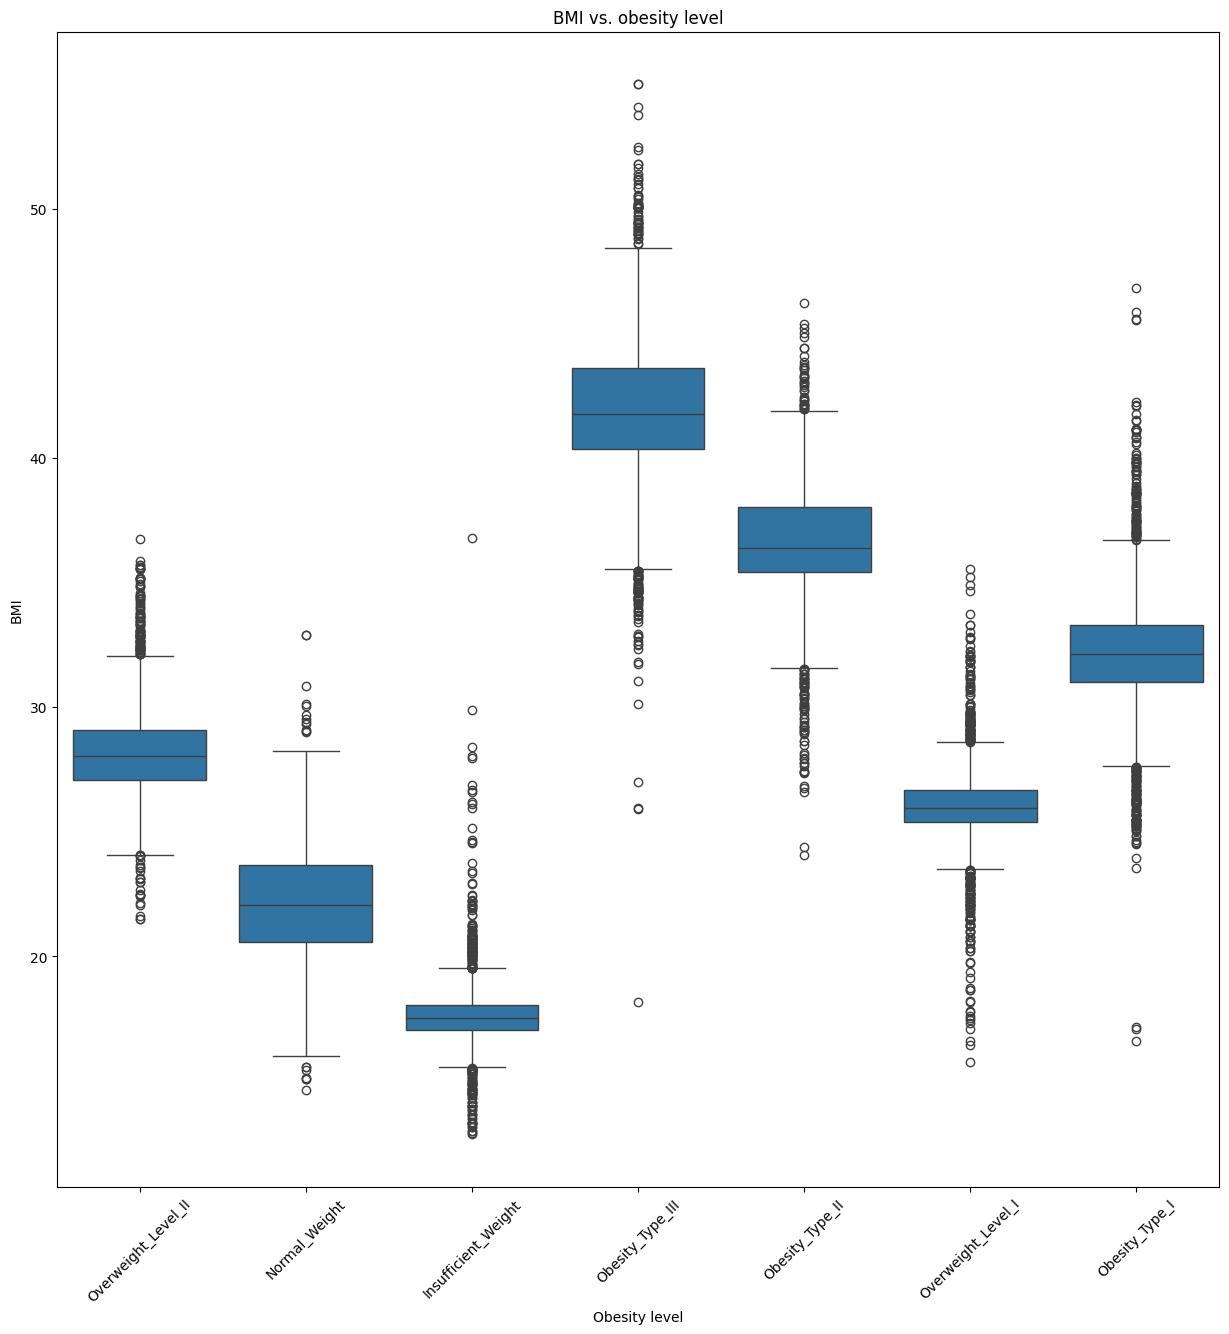

In [151]:
# Thêm cột BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Biểu đồ hộp thể hiện mối quan hệ giữa chỉ số BMI và mức độ béo phì
plt.figure(figsize=(15, 15))
sns.boxplot(x='obesity_level', y='BMI', data=df)
plt.title('BMI vs. obesity level')
plt.xlabel('Obesity level')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

Nhận xét về biểu đồ Boxplot BMI vs. Obesity Level
Biểu đồ boxplot hiển thị phân bố BMI (tính từ Height và Weight) theo từng lớp béo phì (7 lớp).

- Phân biệt rõ rệt: Các lớp được sắp xếp tăng dần BMI hoàn hảo, không chồng chéo box (IQR) giữa các lớp → BMI là yếu tố quyết định trực tiếp mức độ béo phì (như định nghĩa WHO).
- Insufficient_Weight: BMI thấp nhất (~15-20).
- Normal_Weight: ~20-25.
- Overweight_Level_I & II: ~25-30.
- Obesity_Type_I, II, III: Tăng dần từ ~30 đến >45.
- Outliers: Một số điểm ngoại lai ở các lớp cao (Obesity_Type_III có BMI >50).
Nhận xét: Dữ liệu nhất quán với công thức BMI, chứng tỏ dataset chất lượng cao. Tuy nhiên, bài toán dự đoán không chỉ dùng Height/Weight (vì quá dễ), mà kết hợp lối sống để dự báo sớm.

Biểu đồ này rất tốt để minh họa tính hợp lý của target trong phần dữ liệu.

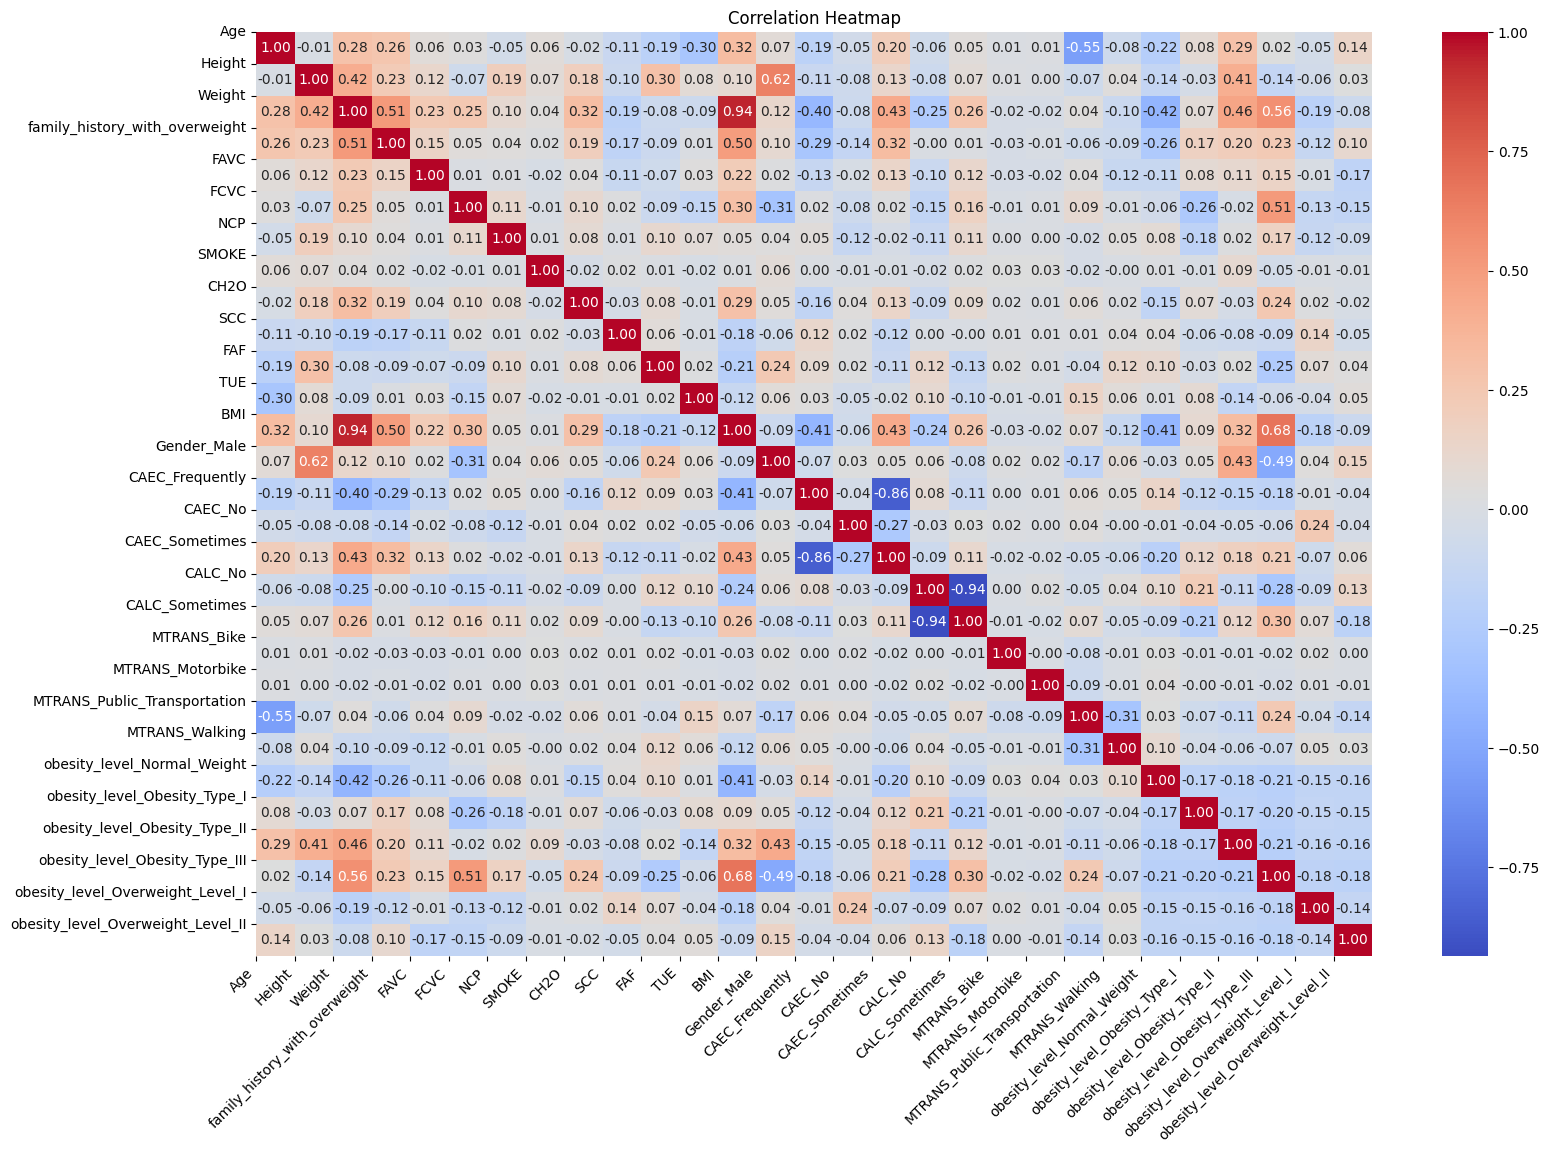

In [152]:
# Kiểm tra các đặc điểm phân loại và áp dụng mã hóa one-hot.
categorical_features = df.select_dtypes(include=['object']).columns
data = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Tạo ma trận tương quan
correlation = data.corr()

# Hình ảnh trực quan của ma trận tương quan
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(correlation, annot=True, fmt='.2f', ax=ax, cmap='coolwarm')

ax.set_title('Correlation Heatmap')

# Đặt nhãn trục
ax.set_xticks(np.arange(len(correlation.columns)))
ax.set_yticks(np.arange(len(correlation.columns)))
ax.set_xticklabels(correlation.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation.columns)

plt.show()

Biểu đồ heatmap tương quan (Pearson correlation) giữa các đặc trưng và target (one-hot encoded cho multi-class).

Tương quan mạnh nhất:
- BMI tương quan cao với các lớp target (0.68 với Overweight_Level_I, 0.49 với Obesity_Type_I, v.v.) → BMI là đặc - trưng quan trọng nhất (như kỳ vọng).
- Weight tương quan mạnh với BMI (0.94) và family_history (0.51).
- family_history_with_overweight tương quan tốt với nhiều lớp béo phì (~0.4-0.5).
- Gender_Male và Height có tương quan với một số lớp.

Tương quan yếu: Các đặc trưng lối sống như FCVC (ăn rau), NCP (bữa ăn), SMOKE, CH2O, FAF, TUE có tương quan thấp (|r| < 0.3) với target → ít phân biệt trực tiếp, nhưng ensemble như Random Forest vẫn khai thác tốt qua tương tác.
Multicollinearity: Weight ~ BMI cao (0.94), Height ~ Gender → cần chú ý khi dùng mô hình tuyến tính (LR, SVM), nhưng Random Forest xử lý tốt.
Nhận xét tổng quát: Không có tương quan tuyến tính mạnh với lối sống → bài toán phức tạp, cần mô hình non-linear như Random Forest

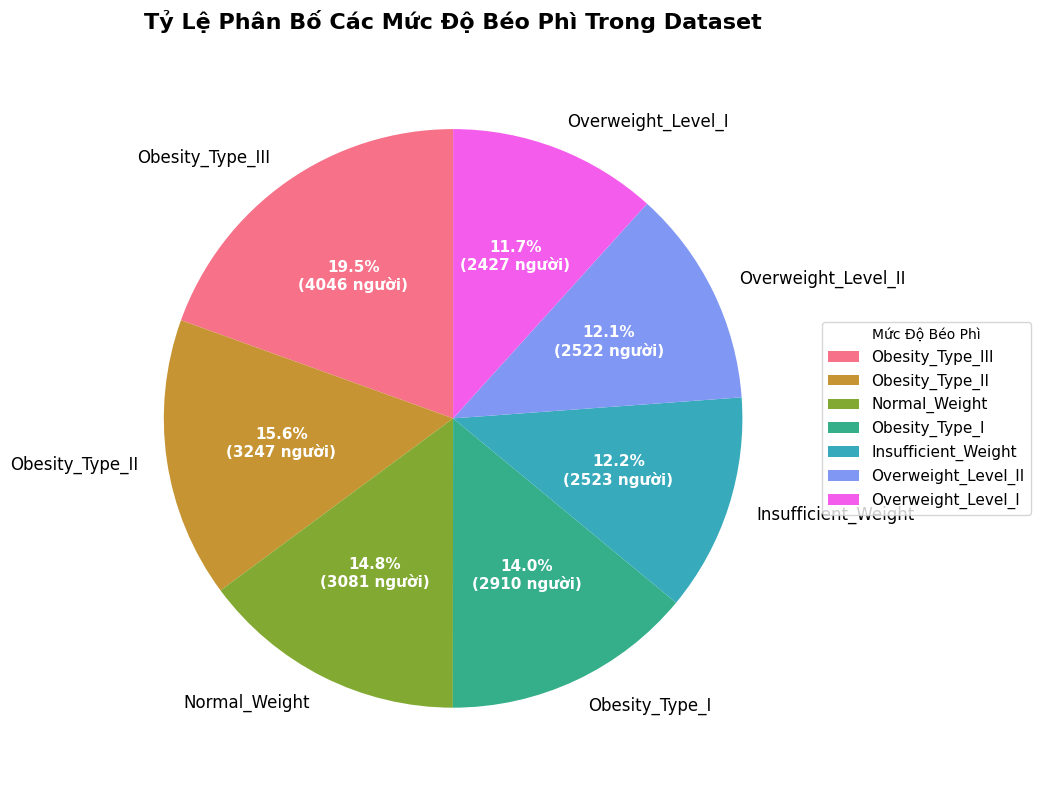

In [153]:
plt.figure(figsize=(10, 8))

# Đếm số lượng từng lớp và tính tỷ lệ phần trăm
obesity_counts = df['obesity_level'].value_counts()
labels = obesity_counts.index
sizes = obesity_counts.values
percentages = 100 * sizes / sizes.sum()

# Vẽ pie chart
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100 * sizes.sum())} người)',
    startangle=90,
    colors=sns.color_palette("husl", len(labels)),
    textprops={'fontsize': 12}
)

# Cải thiện hiển thị phần trăm
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Tiêu đề
plt.title('Tỷ Lệ Phân Bố Các Mức Độ Béo Phì Trong Dataset', fontsize=16, fontweight='bold', pad=20)

# Thêm legend bên cạnh để dễ đọc tên đầy đủ
plt.legend(labels, title="Mức Độ Béo Phì", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Nhận xét về biểu đồ Pie Chart phân bố lớp béo phì
Biểu đồ pie chart hiển thị tỷ lệ phần trăm và số lượng mẫu của 7 lớp mức độ béo phì (tổng ~20,758 mẫu):

- Obesity_Type_III (màu đỏ): Cao nhất ~19.5% (4046 người) → lớp béo phì - nặng nhất chiếm tỷ lệ lớn nhất.
- Obesity_Type_II (màu nâu): ~15.6% (3247 người).
- Normal_Weight (màu xanh lá đậm): ~14.8% (3081 người).
- Obesity_Type_I (màu xanh ngọc): ~14.0% (2910 người).
- Insufficient_Weight (màu xanh dương nhạt): ~12.2% (2523 người).
- Overweight_Level_II (màu tím): ~12.1% (2522 người).
- Overweight_Level_I (màu hồng): ~11.7% (2427 người).

Nhận xét tổng quát: Dataset cân bằng khá tốt giữa 7 lớp (tỷ lệ từ ~11.7% đến 19.5%), không mất cân bằng nghiêm trọng → thuận lợi cho multi-class classification. Lớp béo phì nặng (Type III) chiếm ưu thế nhẹ, phù hợp thực tế dân số nghiên cứu.

In [ ]:
# Chuẩn bị dữ liệu train/test
X = df.drop(['obesity_level'], axis=1)
y = df['obesity_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=)

print(f"Train: {X_train.shape[0]} mẫu")
print(f"Test : {X_test.shape[0]} mẫu")

Train: 16606 mẫu
Test : 4152 mẫu


In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, label_encoder=None, model_name="Model"):
    print(f"\nHuấn luyện và đánh giá: {model_name}")
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics cơ bản
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
    prec = precision_score(y_test, y_test_pred, average='macro')
    rec = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy Train: {acc_train:.4f} | Test: {acc_test:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1-score (macro): {f1:.4f}")

    # Classes
    classes = label_encoder.classes_ if label_encoder else model.classes_
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=classes))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    # PR & ROC macro
    y_test_bin = label_binarize(y_test, classes=classes)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        y_score = model.decision_function(X_test)

    n_classes = len(classes)
    all_recall, mean_precision = np.unique([]), np.zeros(0)
    all_fpr, mean_tpr = np.unique([]), np.zeros(0)
    
    precision_dict, recall_dict, pr_auc_dict = {}, {}, {}
    fpr_dict, tpr_dict, roc_auc_dict = {}, {}, {}
    
    for i in range(n_classes):
        precision_dict[i], recall_dict[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        pr_auc_dict[i] = auc(recall_dict[i], precision_dict[i])
        fpr_dict[i], tpr_dict[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])
    
    # Vẽ biểu đồ
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # PR Curve
    all_recall = np.unique(np.concatenate([recall_dict[i] for i in range(n_classes)]))
    mean_precision = np.zeros_like(all_recall)
    for i in range(n_classes):
        mean_precision += np.interp(all_recall, recall_dict[i][::-1], precision_dict[i][::-1])
    mean_precision /= n_classes
    axes[0].plot(all_recall, mean_precision, color='deepskyblue', linewidth=2)
    axes[0].set_title('Precision-Recall Curve')
    axes[0].set_xlabel('Recall')
    axes[0].set_ylabel('Precision')

    # ROC Curve
    all_fpr = np.unique(np.concatenate([fpr_dict[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr_dict[i], tpr_dict[i])
    mean_tpr /= n_classes
    axes[1].plot(all_fpr, mean_tpr, color='darkorange', linewidth=2)
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_title('ROC Curve')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')

    # Confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2],
                xticklabels=classes, yticklabels=classes, cbar=False)
    axes[2].set_title('Confusion Matrix')
    axes[2].set_xlabel('Predicted')
    axes[2].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

## Các chỉ số dùng để đánh giá hiệu quả của mô hình phân loại

- Precision (Độ chính xác): trong số các dự đoán mô hình nói là lớp A, bao nhiêu % là đúng.

    + Công thức: Precision = TP / (TP + FP)

    + TP = True Positive (dự đoán đúng), FP = False Positive (dự đoán sai là lớp đó).

- Recall (Độ nhạy, hay Tỷ lệ phát hiện): trong số tất cả các mẫu thật sự thuộc lớp A, mô hình dự đoán đúng bao nhiêu %?

    + Công thức: Recall = TP / (TP + FN)

    + FN = False Negative (mẫu thực sự thuộc lớp đó nhưng mô hình dự đoán sai).

- F1-score: trung bình hài hòa giữa precision và recall, cân bằng giữa 2 chỉ số.

    + Công thức: F1 = 2 * (Precision * Recall) / (Precision + Recall)

- Support: số lượng mẫu thực tế thuộc lớp đó trong dữ liệu test.


Huấn luyện và đánh giá: Logistic Regression


c:\Users\84352\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Evaluation:
Accuracy Train: 0.8604 | Test: 0.8613
Precision (macro): 0.8458
Recall (macro): 0.8479
F1-score (macro): 0.8459

Classification Report:


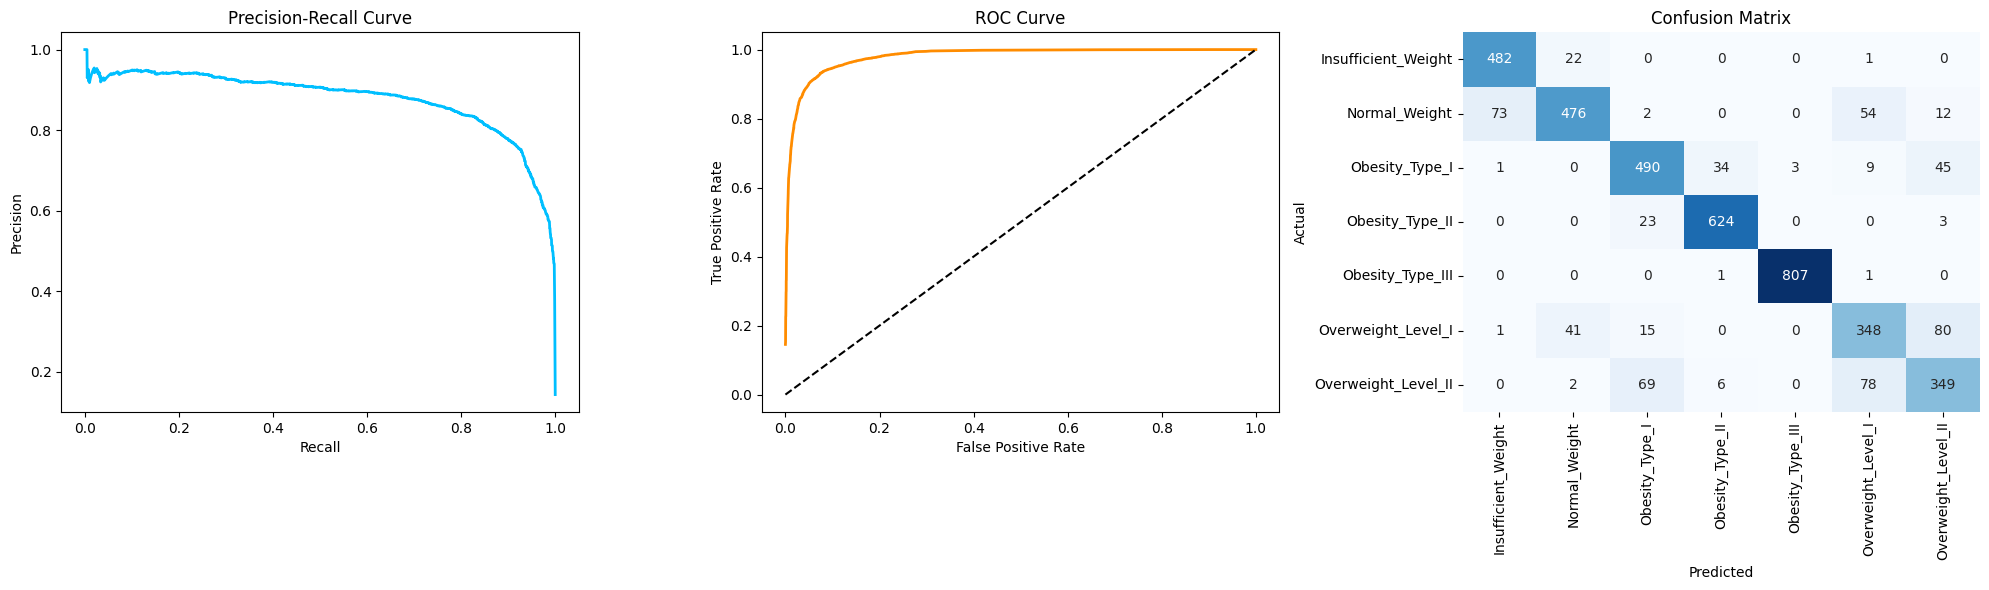

In [173]:
# Logistic Regression

lr = LogisticRegression(
    multi_class='multinomial', # Áp dụng cho đa lớp
    solver='lbfgs',            # Tối ưu hóa cho hàm mất mát
    max_iter=1000,          
    class_weight='balanced',   # Xử lý mất cân bằng lớp
    random_state=42,           # Đặt random_state để tái lập kết quả
    n_jobs=-1                  # Sử dụng đa lõi (chỉ ảnh hưởng đến một số solver)
)

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),  # ← Dùng định nghĩa ở trên
    ('classifier', lr)               # ← Mô hình Logistic Regression
])

# Huấn luyện mô hình
trained_lr = evaluate_model(
    model=pipeline_lr,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    model_name="Logistic Regression"
)


- Độ chính xác (Accuracy):
    + Train: 0.8604, Test: 0.8613
    + Chênh lệch gần bằng 0 (-0.0009) → mô hình không overfitting, tổng quát tốt.
- Các lớp được dự đoán tốt:
    + Obesity_Type_III: precision và recall = 1 → mô hình dự đoán hoàn hảo.
    + Obesity_Type_II và Insufficient_Weight: precision/recall > 0.9 → mô hình ổn định.
- Các lớp khó dự đoán hơn:
    + Overweight_Level_I/II: precision ~0.71, recall ~0.7 → mô hình dễ nhầm lẫn giữa các mức overweight.
    + Normal_Weight: recall thấp hơn precision (0.77 vs 0.88) → một số mẫu thực sự là Normal bị dự đoán nhầm.
- Macro avg / Weighted avg:
    + Macro avg ~0.85 → hiệu suất trung bình giữa các lớp cân bằng.
    + Weighted avg ~0.86 → tổng thể theo số lượng mẫu của mỗi lớp.
- Kết luận tổng thể:
    + Logistic Regression hoạt động ổn định, tổng quát tốt, không overfitting.
    + Hiệu suất cao với các lớp có nhiều mẫu, thấp hơn với các lớp ít khác biệt hoặc dễ nhầm lẫn.


Huấn luyện và đánh giá: Random Forest

Random Forest Evaluation:
Accuracy Train: 0.9187 | Test: 0.8964
Precision (macro): 0.8853
Recall (macro): 0.8857
F1-score (macro): 0.8851


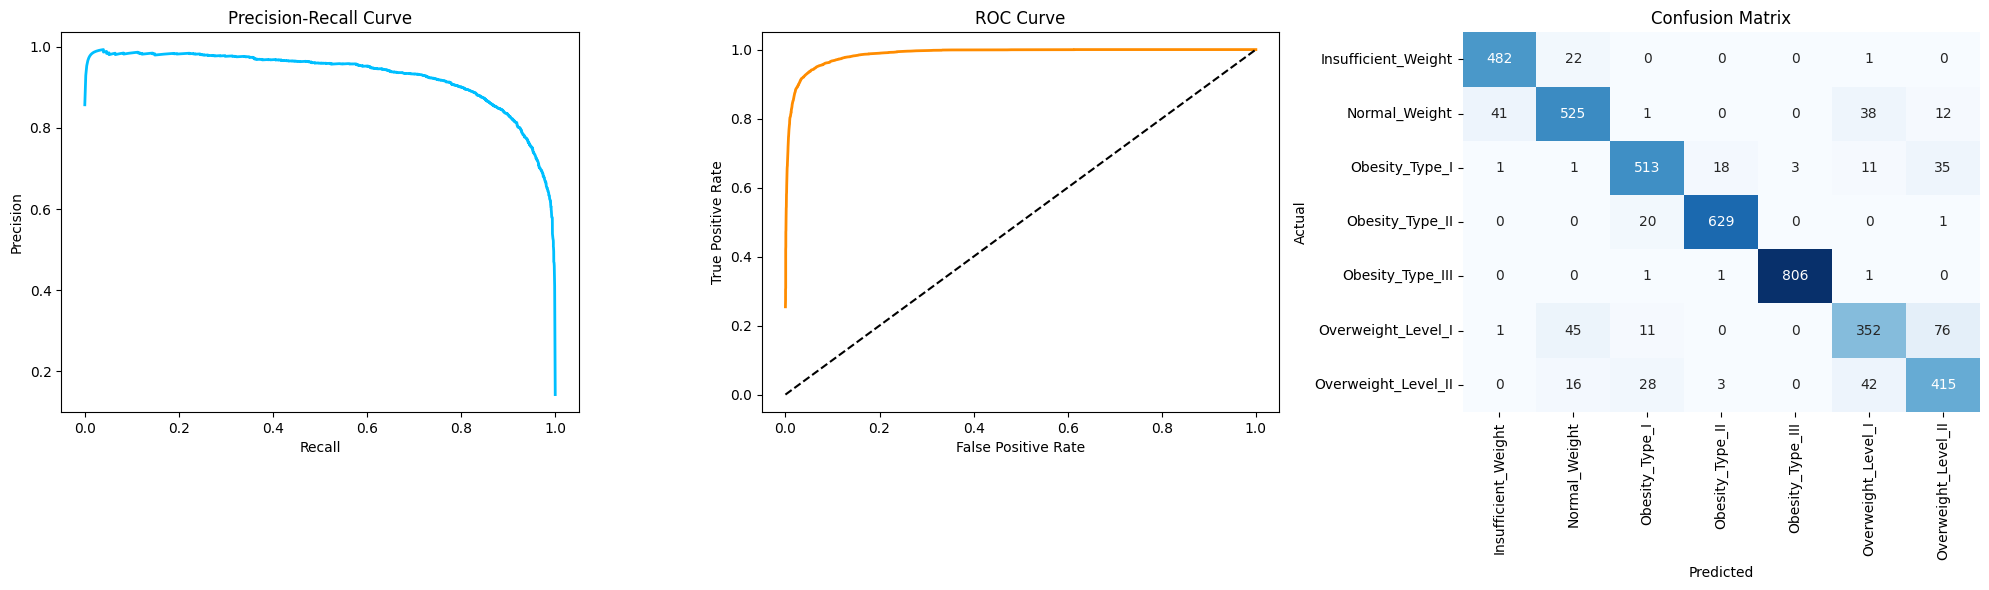

In [170]:
# Random Forest

rf = RandomForestClassifier(
    n_estimators=500,          # Số cây lớn → ổn định hơn
    max_depth=12,              # Giới hạn độ sâu để tránh overfitting
    min_samples_leaf=8,        # Tối thiểu 8 mẫu ở lá → giảm overfitting
    min_samples_split=10,      # Tối thiểu 10 mẫu để split → giảm overfitting
    class_weight='balanced',   # Xử lý mất cân bằng lớp (rất quan trọng!)
    random_state=42,           # Đặt random_state để tái lập kết quả
    n_jobs=-1                  # Sử dụng đa lõi để train nhanh hơn
)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),  # ← Dùng định nghĩa ở trên
    ('classifier', rf)               # ← Mô hình Random Forest   
])

# Huấn luyện mô hình
trained_rf = evaluate_model(
    model=pipeline_rf,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    model_name="Random Forest"
)

- Độ chính xác (Accuracy):
    + Train: 0.9187, Test: 0.8964
    + Chênh lệch 0.0223 → một chút overfitting nhẹ, vẫn chấp nhận được.
- Các lớp dự đoán tốt:
    + Obesity_Type_III: precision và recall = 1 → dự đoán hoàn hảo.
    + Obesity_Type_II và Insufficient_Weight: precision/recall > 0.9 → ổn định.
- Các lớp khó dự đoán hơn:
    + Overweight_Level_I: recall thấp hơn precision (0.73 vs 0.79) → một số mẫu thực sự bị dự đoán nhầm.
    + Overweight_Level_II: precision 0.77, recall 0.82 → nhầm lẫn nhẹ.
- Macro avg / Weighted avg:
    + Macro avg ~0.89 → hiệu suất trung bình giữa các lớp cao hơn Logistic Regression (~0.85).
    + Weighted avg ~0.90 → tổng thể theo số lượng mẫu tốt hơn Logistic Regression (~0.86).
- Kết luận tổng thể:
    + Random Forest chính xác hơn Logistic Regression, đặc biệt với các lớp khó phân biệt (Overweight_Level_I/II).
    + Chỉ hơi overfit trên train, nhưng cải thiện dự đoán tốt cho các lớp ít khác biệt.

In [160]:
# Tạo mẫu dữ liệu giả lập
sample = {
    "Gender": ["Male"],                     # categorical
    "Age": [25],                            # numeric
    "Height": [170],                        # numeric
    "Weight": [80],                         # numeric
    "family_history_with_overweight": [0],  # binary
    "FAVC": [1],                            # numeric
    "FCVC": [2],                            # numeric
    "NCP": [0],                             # numeric
    "CAEC": ["Sometimes"],                  # categorical
    "SMOKE": [0],                           # binary
    "CH2O": [2],                            # numeric
    "SCC": [0],                             # binary
    "FAF": [1.6],                           # numeric
    "TUE": [1],                             # numeric
    "CALC": ["No"],                         # categorical
    "MTRANS": ["Automobile"]                # categorical
}

sample_df = pd.DataFrame(sample)


pred_rf = pipeline_rf.predict(sample_df)
print("Dự đoán:", pred_rf)


Dự đoán: ['Overweight_Level_I']
